### download, load and prepare waterbirds dataset

Needed files for using notebook:

- dataset parser([Download File](https://raw.githubusercontent.com/SohamTolwala/HLCV_project/refs/heads/main/datasets/waterbirds.py?token=GHSAT0AAAAAADDA2JFFSFSPE24WG5ALS3NI2C5I6YA)
) - `waterbirds.py`
- model arch(initialization, [download](https://raw.githubusercontent.com/SohamTolwala/HLCV_project/refs/heads/main/models/resnet_classifier.py?token=GHSAT0AAAAAADDA2JFFZ54ELWSTL4KXJFXQ2C5JB6Q)) - `resnet_classifier.py`
- trained model - `erm_resnet50_waterbirds.py`

In [ ]:
# Cell 1: Upload your Kaggle API token
from google.colab import files
files.upload('')  # Upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sohamtolwala","key":"e4532bc8b9072bb373c888e0657ef0c4"}'}

In [ ]:
# Cell 2: Setup Kaggle API
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Cell 3: Download the Waterbirds dataset
!kaggle datasets download -d bahardibaie/waterbird
!unzip waterbird.zip -d waterbirds_data

Streaming output truncated to the last 5000 lines.
  inflating: waterbirds_data/waterbird/dataset/117.Clay_colored_Sparrow/Clay_Colored_Sparrow_0001_110632.jpg  
  inflating: waterbirds_data/waterbird/dataset/117.Clay_colored_Sparrow/Clay_Colored_Sparrow_0002_110606.jpg  
  inflating: waterbirds_data/waterbird/dataset/117.Clay_colored_Sparrow/Clay_Colored_Sparrow_0003_110672.jpg  
  inflating: waterbirds_data/waterbird/dataset/117.Clay_colored_Sparrow/Clay_Colored_Sparrow_0005_110911.jpg  
  inflating: waterbirds_data/waterbird/dataset/117.Clay_colored_Sparrow/Clay_Colored_Sparrow_0008_110536.jpg  
  inflating: waterbirds_data/waterbird/dataset/117.Clay_colored_Sparrow/Clay_Colored_Sparrow_0009_797256.jpg  
  inflating: waterbirds_data/waterbird/dataset/117.Clay_colored_Sparrow/Clay_Colored_Sparrow_0010_797262.jpg  
  inflating: waterbirds_data/waterbird/dataset/117.Clay_colored_Sparrow/Clay_Colored_Sparrow_0014_797248.jpg  
  inflating: waterbirds_data/waterbird/dataset/117.Clay_color

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from waterbirds import WaterbirdsDataset
from resnet_classifier import ResNet50Classifier
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'waterbirds'

In [ ]:
# ---- Transforms ---- #
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
 # Cell 3: Download the Waterbirds dataset
!kaggle datasets download -d bahardibaie/waterbird
!unzip waterbird.zip -d waterbirds_data

Dataset URL: https://www.kaggle.com/datasets/bahardibaie/waterbird
License(s): unknown
waterbird.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  waterbird.zip
replace waterbirds_data/waterbird/001.Black_footed_Albatross/Black_Footed_Albatross_0001_796111.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### scratch Training

In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader

from waterbirds import WaterbirdsDataset  # assuming you’ve uploaded this .py to colab

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Point this to where Colab unzipped the data
dataset_root = "./waterbirds_data/waterbird"


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
epochs = 50
lr = 1e-4


train_set = WaterbirdsDataset(root_dir=dataset_root, split="train", transform=transform)
val_set = WaterbirdsDataset(root_dir=dataset_root, split="val", transform=transform)

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)


In [ ]:
model = ResNet50Classifier(pretrained=False).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
# ---- Training Loop ---- #
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * images.size(0)

    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_loss:.4f}")


Epoch 1/50 - Train Loss: 0.3689
Epoch 2/50 - Train Loss: 0.3211
Epoch 3/50 - Train Loss: 0.3033
Epoch 4/50 - Train Loss: 0.2982
Epoch 5/50 - Train Loss: 0.2781
Epoch 6/50 - Train Loss: 0.2758
Epoch 7/50 - Train Loss: 0.2680
Epoch 8/50 - Train Loss: 0.2651
Epoch 9/50 - Train Loss: 0.2587
Epoch 10/50 - Train Loss: 0.2384
Epoch 11/50 - Train Loss: 0.2312
Epoch 12/50 - Train Loss: 0.2092
Epoch 13/50 - Train Loss: 0.2155
Epoch 14/50 - Train Loss: 0.1912
Epoch 15/50 - Train Loss: 0.1567
Epoch 16/50 - Train Loss: 0.1340
Epoch 17/50 - Train Loss: 0.1056
Epoch 18/50 - Train Loss: 0.0964
Epoch 19/50 - Train Loss: 0.0912
Epoch 20/50 - Train Loss: 0.0832
Epoch 21/50 - Train Loss: 0.0657
Epoch 22/50 - Train Loss: 0.0549
Epoch 23/50 - Train Loss: 0.0522
Epoch 24/50 - Train Loss: 0.0607
Epoch 25/50 - Train Loss: 0.0528
Epoch 26/50 - Train Loss: 0.0426
Epoch 27/50 - Train Loss: 0.0342
Epoch 28/50 - Train Loss: 0.0216
Epoch 29/50 - Train Loss: 0.0387
Epoch 30/50 - Train Loss: 0.0333
Epoch 31/50 - Train

##### Validation accuracy --> poor performance

In [ ]:
model.eval()
preds, gts = [], []
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds.extend(outputs.argmax(1).cpu().tolist())
        gts.extend(labels.cpu().tolist())

acc = accuracy_score(gts, preds)
print(f"Validation Accuracy: {acc:.4f}\n")


Validation Accuracy: 0.6881



##### epoch_loss Plot

Text(0, 0.5, 'Loss')

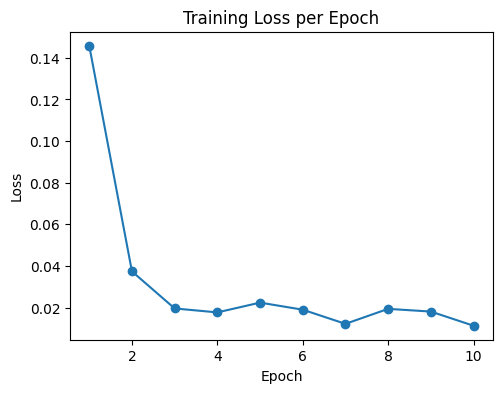

In [ ]:
import matplotlib.pyplot as plt

# Assuming you saved losses and val accuracies in lists
train_losses = [0.1458, 0.0374, 0.0196, 0.0177, 0.0224, 0.0190, 0.0122, 0.0194, 0.0181, 0.0113]
val_accuracies = [0.8082] * 10  # If you only printed last epoch's val acc, replicate for now

epochs_range = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, marker='o')
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")


SAVE MODEL

In [ ]:
# Saving model weights
save_path = 'erm_resnet50_waterbirds.pth'
torch.save(model.state_dict(), save_path)
print(f"Model saved to {save_path}")

Model saved to erm_resnet50_waterbirds.pth


### pretrained training

In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader

from waterbirds import WaterbirdsDataset  # assuming you’ve uploaded this .py to colab

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Point this to where Colab unzipped the data
dataset_root = "./waterbirds_data/waterbird"


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 32
epochs = 50
lr = 1e-4


train_set = WaterbirdsDataset(root_dir=dataset_root, split="train", transform=transform)
val_set = WaterbirdsDataset(root_dir=dataset_root, split="val", transform=transform)

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models


class ResNet50Classifier_freezed(nn.Module):
    def __init__(self, num_classes=2, pretrained=True):
        super().__init__()
        self.backbone = models.resnet50(pretrained=pretrained)
        in_features = self.backbone.fc.in_features
        self.backbone.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.backbone(x)


model = ResNet50Classifier_freezed(pretrained=True).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
# ---- Training Loop ---- #
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * images.size(0)

    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_loss:.4f}")


In [ ]:
model.eval()
preds, gts = [], []
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds.extend(outputs.argmax(1).cpu().tolist())
        gts.extend(labels.cpu().tolist())

acc = accuracy_score(gts, preds)
print(f"Validation Accuracy: {acc:.4f}\n")


In [ ]:
import matplotlib.pyplot as plt

# Assuming you saved losses and val accuracies in lists
train_losses = [0.1458, 0.0374, 0.0196, 0.0177, 0.0224, 0.0190, 0.0122, 0.0194, 0.0181, 0.0113]
val_accuracies = [0.8082] * 10  # If you only printed last epoch's val acc, replicate for now

epochs_range = range(1, len(train_losses) + 1)

plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, marker='o')
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")


In [ ]:
# Saving model weights
save_path = 'erm_resnet50_waterbirds_pretrained.pth'
torch.save(model.state_dict(), save_path)
print(f"Model saved to {save_path}")

### ERM + SSL(DiNO(freezed backbone))

In [ ]:
!pip install -q vit-pytorch

In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader

from waterbirds import WaterbirdsDataset  # assuming you’ve uploaded this .py to colab

# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor()
# ])


transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],   # Standard ImageNet stats
        std=[0.229, 0.224, 0.225]
    )
])


# Point this to where Colab unzipped the data
dataset_root = "/content/waterbirds_data/waterbird"


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 64
epochs = 200
lr = 1e-4


train_set = WaterbirdsDataset(root_dir=dataset_root, split="train", transform=transform)
val_set = WaterbirdsDataset(root_dir=dataset_root, split="val", transform=transform)

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)


In [ ]:
import torch
import torch.nn as nn
from functools import partial
import math
from collections import OrderedDict

In [ ]:
def load_dino_vits8_weights(model, ckpt_path):
    print("🔁 Loading DINO ViT-S/8 checkpoint...")
    state_dict = torch.load(ckpt_path, map_location="cpu")

    # In case the checkpoint is wrapped in 'state_dict' key
    if 'teacher' in state_dict:
        state_dict = state_dict['teacher']

    # Clean up keys: remove module. prefix and discard projection head
    new_state_dict = OrderedDict()
    for k, v in state_dict.items():
        if "head" in k or "fc" in k:  # projection head: skip it
            continue
        new_k = k.replace("module.", "")
        new_state_dict[new_k] = v

    msg = model.load_state_dict(new_state_dict, strict=False)
    print("✅ Loaded with:", msg)
    return model


In [ ]:
class DinoERMClassifier(nn.Module):
    def __init__(self, pretrained_dino, head_type='linear', num_classes=2):
        super().__init__()
        self.backbone = pretrained_dino
        for param in self.backbone.parameters():
            param.requires_grad = False

        if head_type == 'linear':
            self.head = nn.Linear(384, num_classes)
        elif head_type == 'mlp':
            self.head = nn.Sequential(
                nn.Linear(384, 512),
                nn.ReLU(),
                nn.Linear(512, num_classes)
            )
        else:
            raise ValueError("head_type must be 'linear' or 'mlp'")

    def forward(self, x):
        with torch.no_grad():
            features = self.backbone(x)
        return self.head(features)


In [ ]:
#Usage
import numpy as np
import torch
import torchvision.transforms as T
from PIL import Image
import cv2
import json
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import requests

# Load Dino-v2 model
dinov2_vits14 = torch.hub.load("facebookresearch/dinov2", "dinov2_vits14")

# Choose device
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

# Move model to device
dinov2_vits14.to(device)

🔁 Loading DINO ViT-S/8 checkpoint...
✅ Loaded with: _IncompatibleKeys(missing_keys=['blocks.0.attn.in_proj_weight', 'blocks.0.attn.in_proj_bias', 'blocks.0.attn.out_proj.weight', 'blocks.0.attn.out_proj.bias', 'blocks.0.mlp.0.weight', 'blocks.0.mlp.0.bias', 'blocks.0.mlp.2.weight', 'blocks.0.mlp.2.bias', 'blocks.1.attn.in_proj_weight', 'blocks.1.attn.in_proj_bias', 'blocks.1.attn.out_proj.weight', 'blocks.1.attn.out_proj.bias', 'blocks.1.mlp.0.weight', 'blocks.1.mlp.0.bias', 'blocks.1.mlp.2.weight', 'blocks.1.mlp.2.bias', 'blocks.2.attn.in_proj_weight', 'blocks.2.attn.in_proj_bias', 'blocks.2.attn.out_proj.weight', 'blocks.2.attn.out_proj.bias', 'blocks.2.mlp.0.weight', 'blocks.2.mlp.0.bias', 'blocks.2.mlp.2.weight', 'blocks.2.mlp.2.bias', 'blocks.3.attn.in_proj_weight', 'blocks.3.attn.in_proj_bias', 'blocks.3.attn.out_proj.weight', 'blocks.3.attn.out_proj.bias', 'blocks.3.mlp.0.weight', 'blocks.3.mlp.0.bias', 'blocks.3.mlp.2.weight', 'blocks.3.mlp.2.bias', 'blocks.4.attn.in_proj_weigh

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score
from tqdm import tqdm

def train_erm_model(model, train_loader, val_loader, device, epochs=10, lr=1e-4):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.head.parameters(), lr=lr)

    best_acc = 0.0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for images, labels in tqdm(train_loader, desc=f"[Epoch {epoch+1}]"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        train_loss = running_loss / len(train_loader.dataset)

        # Validation
        model.eval()
        preds, gts = [], []
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                preds.extend(outputs.argmax(1).cpu().tolist())
                gts.extend(labels.cpu().tolist())
        acc = accuracy_score(gts, preds)

        print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Val Acc = {acc:.4f}")

        # Save best model
        if acc > best_acc:
            best_acc = acc
            torch.save(model.state_dict(), "erm_dino_vits8.pth")
            print("📦 Best model saved.")

    print(f"\n✅ Final Val Accuracy: {best_acc:.4f}")


In [ ]:
train_erm_model(
    model=DinoERMClassifier(dinov2_vits14, head_type='linear'),
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    epochs=50,
    lr=1e-4
)


[Epoch 1]: 100%|██████████| 150/150 [02:01<00:00,  1.23it/s]


Epoch 1: Train Loss = 0.3980, Val Acc = 0.6214
📦 Best model saved.


[Epoch 2]: 100%|██████████| 150/150 [01:55<00:00,  1.30it/s]


Epoch 2: Train Loss = 0.3535, Val Acc = 0.6439
📦 Best model saved.


[Epoch 3]: 100%|██████████| 150/150 [01:56<00:00,  1.29it/s]


Epoch 3: Train Loss = 0.3470, Val Acc = 0.6022


[Epoch 4]: 100%|██████████| 150/150 [01:56<00:00,  1.29it/s]


Epoch 4: Train Loss = 0.3442, Val Acc = 0.6180


[Epoch 5]: 100%|██████████| 150/150 [01:55<00:00,  1.29it/s]


Epoch 5: Train Loss = 0.3389, Val Acc = 0.6188


[Epoch 6]: 100%|██████████| 150/150 [01:56<00:00,  1.29it/s]


Epoch 6: Train Loss = 0.3369, Val Acc = 0.6088


[Epoch 7]: 100%|██████████| 150/150 [01:56<00:00,  1.29it/s]


Epoch 7: Train Loss = 0.3350, Val Acc = 0.5972


[Epoch 8]: 100%|██████████| 150/150 [01:56<00:00,  1.29it/s]


Epoch 8: Train Loss = 0.3324, Val Acc = 0.5980


[Epoch 9]: 100%|██████████| 150/150 [01:56<00:00,  1.29it/s]


Epoch 9: Train Loss = 0.3314, Val Acc = 0.5922


[Epoch 10]: 100%|██████████| 150/150 [01:56<00:00,  1.29it/s]


Epoch 10: Train Loss = 0.3283, Val Acc = 0.5963


[Epoch 11]: 100%|██████████| 150/150 [01:56<00:00,  1.29it/s]


Epoch 11: Train Loss = 0.3285, Val Acc = 0.5988


[Epoch 12]: 100%|██████████| 150/150 [01:56<00:00,  1.29it/s]


Epoch 12: Train Loss = 0.3271, Val Acc = 0.6063


[Epoch 13]:  22%|██▏       | 33/150 [00:25<01:29,  1.31it/s]

### ERM dinov2 as backbone

In [ ]:
from torchvision import transforms
from torch.utils.data import DataLoader
from waterbirds import WaterbirdsDataset

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Required for ViT-S/14
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],   # Standard ImageNet stats
        std=[0.229, 0.224, 0.225]
    )
])

dataset_root = "/content/waterbirds_data/waterbird"

train_set = WaterbirdsDataset(root_dir=dataset_root, split="train", transform=transform)
val_set   = WaterbirdsDataset(root_dir=dataset_root, split="val", transform=transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_set, batch_size=64)


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load DINOv2 ViT-S/14
dinov2_vits14 = torch.hub.load("facebookresearch/dinov2", "dinov2_vits14")
dinov2_vits14.to(device)
dinov2_vits14.eval()  # Freeze mode


Downloading: "https://github.com/facebookresearch/dinov2/zipball/main" to /root/.cache/torch/hub/main.zip
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")
Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vits14/dinov2_vits14_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dinov2_vits14_pretrain.pth
100%|██████████| 84.2M/84.2M [00:01<00:00, 61.4MB/s]


DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 384, kernel_size=(14, 14), stride=(14, 14))
    (norm): Identity()
  )
  (blocks): ModuleList(
    (0-11): 12 x NestedTensorBlock(
      (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (attn): MemEffAttention(
        (qkv): Linear(in_features=384, out_features=1152, bias=True)
        (proj): Linear(in_features=384, out_features=384, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=384, out_features=1536, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=1536, out_features=384, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
      (drop_path2): Identity()
    )
  )
  (norm): LayerNorm((384,), eps=1e-06, elementwise_affi

In [ ]:
import torch.nn as nn

# class DinoERMClassifier(nn.Module):
#     def __init__(self, pretrained_dino, head_type='linear', num_classes=2):
#         super().__init__()
#         self.backbone = pretrained_dino
#         for param in self.backbone.parameters():
#             param.requires_grad = False

#         if head_type == 'linear':
#             self.head = nn.Linear(384, num_classes)
#         elif head_type == 'mlp':
#             self.head = nn.Sequential(
#                 nn.Linear(384, 512),
#                 nn.ReLU(),
#                 nn.Linear(512, num_classes)
#             )
#         else:
#             raise ValueError("head_type must be 'linear' or 'mlp'")

#     def forward(self, x):
#         with torch.no_grad():
#             features = self.backbone(x)
#         return self.head(features)


class DinoERMClassifier(nn.Module):
    def __init__(self, pretrained_dino, head_type='linear', num_classes=2):
        super().__init__()
        self.backbone = pretrained_dino
        for param in self.backbone.parameters():
            param.requires_grad = False

        if head_type == 'linear':
            self.head = nn.Linear(384, num_classes)
        elif head_type == 'mlp':
            self.head = nn.Sequential(
                nn.Linear(384, 512),
                nn.ReLU(),
                nn.Linear(512, num_classes)
            )
        else:
            raise ValueError("head_type must be 'linear' or 'mlp'")

    def forward(self, x):
        # *** DO NOT use torch.no_grad() here! ***
        # For DINOv2 ViT, get features using forward_features and extract CLS token
        out = self.backbone.forward_features(x)
        features = out["x_norm_clstoken"]  # shape [B, 384]
        return self.head(features)


In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import torch.nn as nn

def train_erm_model(model, train_loader, val_loader, device, epochs=200, lr=1e-4):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.head.parameters(), lr=lr)

    best_acc = 0.0

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for images, labels in tqdm(train_loader, desc=f"[Epoch {epoch+1}]"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        train_loss = running_loss / len(train_loader.dataset)

        # Validation
        model.eval()
        preds, gts = [], []
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                preds.extend(outputs.argmax(1).cpu().tolist())
                gts.extend(labels.cpu().tolist())
        acc = accuracy_score(gts, preds)

        print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Val Acc = {acc:.4f}")

        # Save best model
        if acc > best_acc:
            best_acc = acc
            torch.save(model.state_dict(), "erm_dinov2_linear.pth")
            print("📦 Best model saved.")

    print(f"\n✅ Final Val Accuracy: {best_acc:.4f}")


In [ ]:
classifier = DinoERMClassifier(dinov2_vits14, head_type='linear')
train_erm_model(
    model=classifier,
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    epochs=250,
    lr=1e-4
)


[Epoch 1]: 100%|██████████| 75/75 [00:41<00:00,  1.79it/s]


Epoch 1: Train Loss = 0.5247, Val Acc = 0.7923
📦 Best model saved.


[Epoch 2]: 100%|██████████| 75/75 [00:41<00:00,  1.83it/s]


Epoch 2: Train Loss = 0.2434, Val Acc = 0.8440
📦 Best model saved.


[Epoch 3]: 100%|██████████| 75/75 [00:40<00:00,  1.85it/s]


In [ ]:
torch.save(model.state_dict(), "erm_dinov2_new.pth")

In [ ]:
model = DinoERMClassifier(pretrained_dino=dinov2_vits14, head_type='linear')
model.load_state_dict(torch.load("/content/erm_dinov2_linear.pth"))
model.eval().to(device)

DinoERMClassifier(
  (backbone): DinoVisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 384, kernel_size=(14, 14), stride=(14, 14))
      (norm): Identity()
    )
    (blocks): ModuleList(
      (0-11): 12 x NestedTensorBlock(
        (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
        (attn): MemEffAttention(
          (qkv): Linear(in_features=384, out_features=1152, bias=True)
          (proj): Linear(in_features=384, out_features=384, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (ls1): LayerScale()
        (drop_path1): Identity()
        (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=384, out_features=1536, bias=True)
          (act): GELU(approximate='none')
          (fc2): Linear(in_features=1536, out_features=384, bias=True)
          (drop): Dropout(p=0.0, inplace=False)
        )
        (ls2): LayerScale()
        (drop_path2

In [ ]:
import os
import pandas as pd
from torch.utils.data import Dataset
from PIL import Image

class WaterbirdsDatasetIRM(Dataset):
    def __init__(self, metadata_csv, img_root, split, transform=None):
        self.metadata = pd.read_csv(metadata_csv)
        self.metadata = self.metadata[self.metadata['split'] == split]
        self.img_root = img_root
        self.transform = transform

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        row = self.metadata.iloc[idx]
        img_path = os.path.join(self.img_root, row['img_filename'])
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        label = int(row['y'])
        place = int(row['place'])  # 0 = land, 1 = water
        return image, label, place


In [ ]:
class GroupEvaluator:
    def __init__(self):
        self.correct = {g: 0 for g in range(4)}
        self.total = {g: 0 for g in range(4)}

    def add(self, logits, labels, place):
        preds = torch.argmax(logits, dim=1)  # logits.shape = [B, 2]
        for i in range(len(labels)):
            group = 2 * labels[i].item() + place[i].item()
            self.correct[group] += int(preds[i] == labels[i])
            self.total[group] += 1

    def report(self):
        accs = {g: 100.0 * self.correct[g] / self.total[g] if self.total[g] > 0 else 0.0 for g in range(4)}
        avg = sum(accs.values()) / 4
        worst = min(accs.values())
        return accs, avg, worst


In [ ]:
from torch.utils.data import DataLoader

def evaluate(model, loader, device):
    model.eval()
    evaluator = GroupEvaluator()
    with torch.no_grad():
        for x, y, place in loader:
            x, y, place = x.to(device), y.to(device), place.to(device)
            logits = model(x)
            evaluator.add(logits, y, place)
    return evaluator.report()


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

metadata_csv = '/content/waterbirds_data/waterbird/metadata.csv'
img_root = '/content/waterbirds_data/waterbird'

val_dataset_grouped = WaterbirdsDatasetIRM(metadata_csv, img_root, split=1, transform=transform)
val_loader_grouped = DataLoader(val_dataset_grouped, batch_size=64, shuffle=False)

accs, avg, worst = evaluate(model, val_loader_grouped, device)

print("Group-wise Val Accuracies:", accs)
print(f"Average Accuracy: {avg:.2f}%")
print(f"Worst-Group Accuracy: {worst:.2f}%")


Group-wise Val Accuracies: {0: 95.71734475374733, 1: 82.40343347639485, 2: 54.13533834586466, 3: 83.45864661654136}
Average Accuracy: 78.93%
Worst-Group Accuracy: 54.14%


### gradcam visualizations

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import cv2
from torchvision import models, transforms
from PIL import Image


In [ ]:
# from resnet_classifier import ResNet50Classifier
# model = ResNet50Classifier(pretrained=True)
# model.load_state_dict(torch.load('erm_resnet50_waterbirds.pth'))
# model.eval().cuda()



vit = DINOvits8()
vit = load_dino_vits8_weights(vit, PRETRAINED_PATH)

# Create final ERM model
model = DinoERMClassifier(pretrained_dino=vit, head_type='linear').to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet50Classifier(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential

In [ ]:
  # ---- Define GradCAM Class ---- #
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer

        self.activations = None
        self.gradients = None

        # hook for forward pass
        self.fwd_hook = self.target_layer.register_forward_hook(self._save_activations)
        # hook for backward pass
        self.bwd_hook = self.target_layer.register_backward_hook(self._save_gradients)

    def _save_activations(self, module, input, output):
        self.activations = output.detach()

    def _save_gradients(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()

    def __call__(self, input_tensor, class_idx=None):
        self.model.zero_grad()
        output = self.model(input_tensor)

        if class_idx is None:
            class_idx = output.argmax(dim=1).item()

        class_score = output[:, class_idx]
        class_score.backward()

        weights = self.gradients.mean(dim=[2, 3], keepdim=True)  # global avg pooling
        cam = (weights * self.activations).sum(dim=1, keepdim=True)

        cam = F.relu(cam)
        cam = cam.squeeze().cpu().numpy()
        cam = cv2.resize(cam, (224, 224))
        cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)  # normalize
        return cam



In [ ]:
# --- Overlay CAM on Image ---
def show_gradcam_on_image(pil_img, cam):
    img = np.array(pil_img.resize((224, 224)))
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    overlay = heatmap + np.float32(img) / 255
    overlay = overlay / np.max(overlay)
    return np.uint8(255 * overlay)


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1830: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


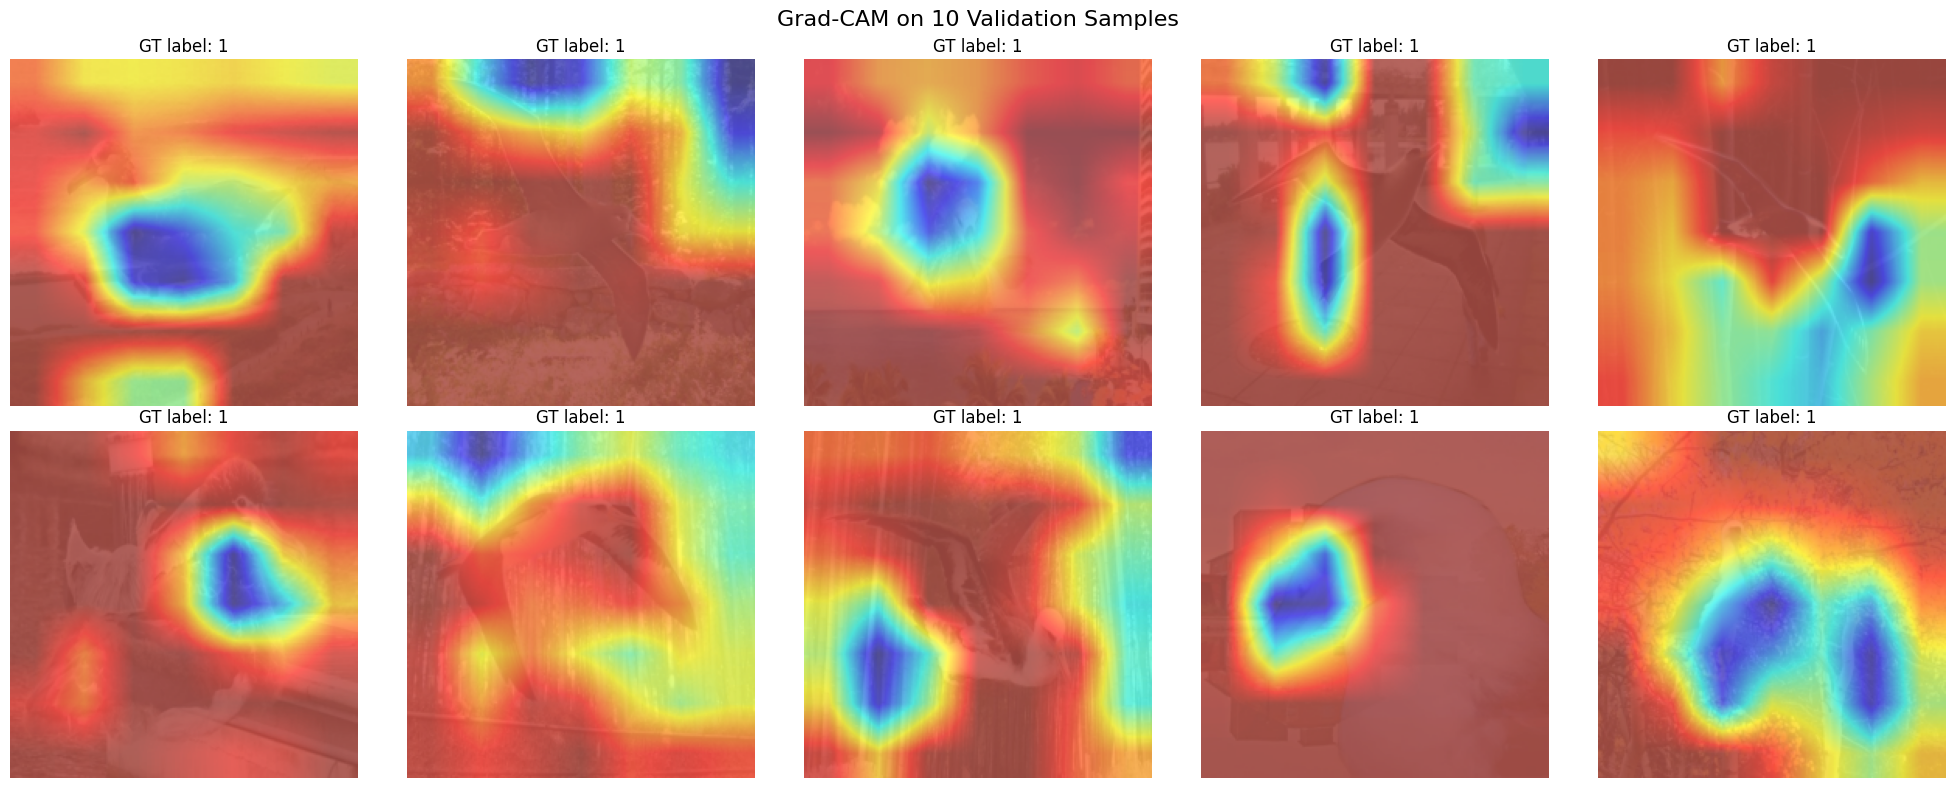

In [ ]:
# --- Load 10 Samples from val_loader ---
samples = []
labels = []
original_imgs = []

for img_batch, label_batch in val_loader:
    for img, label in zip(img_batch, label_batch):
        samples.append(img.unsqueeze(0).cuda())  # shape [1, 3, 224, 224]
        labels.append(label.item())
        img_np = img.permute(1, 2, 0).cpu().numpy()
        img_np = (img_np * np.array([0.229, 0.224, 0.225]) +
                  np.array([0.485, 0.456, 0.406]))  # unnormalize
        img_np = np.clip(img_np, 0, 1)
        original_imgs.append(Image.fromarray((img_np * 255).astype(np.uint8)))
        if len(samples) >= 10:
            break
    if len(samples) >= 10:
        break

# --- Run Grad-CAM on Each Sample ---
target_layer = model.backbone.layer4
gradcam = GradCAM(model, target_layer)

fig, axs = plt.subplots(2, 5, figsize=(20, 8))

for i in range(10):
    cam = gradcam(samples[i])
    overlay_img = show_gradcam_on_image(original_imgs[i], cam)
    ax = axs[i // 5][i % 5]
    ax.imshow(overlay_img)
    ax.set_title(f"GT label: {labels[i]}")
    ax.axis('off')

plt.suptitle("Grad-CAM on 10 Validation Samples", fontsize=16)
plt.tight_layout()
plt.show()